In [1]:
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from PIL import Image

In [3]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
df.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [9]:
df.shape

(13490604, 7)

In [16]:
df['value'].isna().sum()

0

In [17]:
df['year'].isna().sum()

0

In [18]:
df['month'].isna().sum()

0

In [19]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [20]:
df

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [72]:
df['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [115]:
#borough yg paling banyak kasus crime-nya
boro = df.groupby(['borough'])['value'].sum()
boro.sort_values(ascending=False)

borough
Westminster               455028
Lambeth                   292178
Southwark                 278809
Camden                    275147
Newham                    262024
Croydon                   260294
Ealing                    251562
Islington                 230286
Tower Hamlets             228613
Brent                     227551
Hackney                   217119
Lewisham                  215137
Haringey                  213272
Barnet                    212191
Hillingdon                209680
Wandsworth                204741
Waltham Forest            203879
Enfield                   193880
Hounslow                  186772
Hammersmith and Fulham    185259
Bromley                   184349
Redbridge                 183562
Greenwich                 181568
Kensington and Chelsea    171981
Barking and Dagenham      149447
Havering                  138947
Harrow                    116848
Merton                    115654
Bexley                    114136
Sutton                    100987
Ri

In [150]:
plt.style.use('ggplot')

#### Question 1
### In what month the highest crime rate happened in Westminster in 2016?

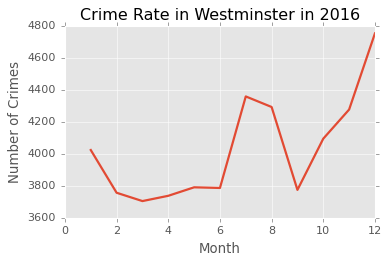

In [167]:
Wsmt_16 = df[
                ((df['year'] == 2016) &
                (df['borough'] == 'Westminster'))
].groupby(['month'])['value'].sum()


Wsmt_16.plot(figsize=(5, 3))
plt.title('Crime Rate in Westminster in 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.show()

#### Answer 1
### The highest crime rate in Westminster in 2016 is happened in December

In [129]:
#coba coba aja
WES = df.loc[(df['borough'].isin(['Westminster','Enfield', 'Sutton'])) & 
              (df['year']==2016)
]
WES.groupby(['month', 'borough'])['value'].sum()

month  borough    
1      Enfield        1739
       Sutton          895
       Westminster    4022
2      Enfield        1723
       Sutton          914
       Westminster    3755
3      Enfield        1961
       Sutton          942
       Westminster    3703
4      Enfield        1880
       Sutton          904
       Westminster    3736
5      Enfield        2049
       Sutton          932
       Westminster    3789
6      Enfield        1777
       Sutton          896
       Westminster    3785
7      Enfield        1972
       Sutton          831
       Westminster    4357
8      Enfield        1773
       Sutton          768
       Westminster    4291
9      Enfield        1900
       Sutton          898
       Westminster    3773
10     Enfield        1972
       Sutton          847
       Westminster    4093
11     Enfield        1960
       Sutton          960
       Westminster    4275
12     Enfield        1779
       Sutton          871
       Westminster    4751
Name: val

#### Question 2
### How many cases per month is the most frequent crime that happened in Westminster in 2016?

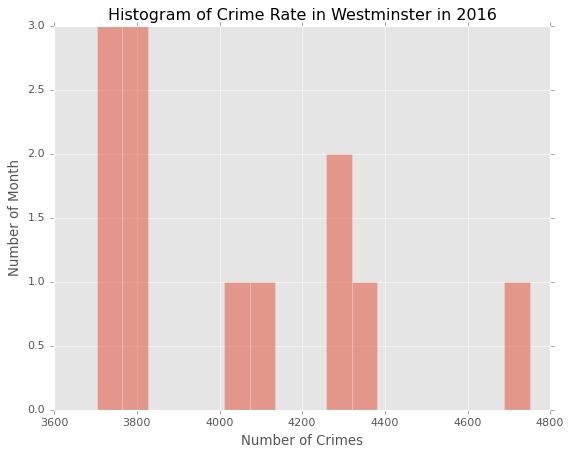

In [168]:
Wsmt_16.plot(kind ='hist', alpha=.5, bins=17)
plt.title('Histogram of Crime Rate in Westminster in 2016')
plt.ylabel('Number of Month')
plt.xlabel('Number of Crimes')
plt.show()

#### Answer 2
### The most frequent crime that happened in Westminster in 2016 is below 4000 cases per month

#### Question 3
### What is the most number of crimes by major category that happened in 2016?

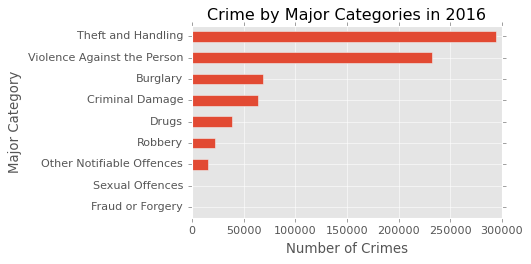

In [170]:
Major_16 = df.loc[(df['year'] == 2016)].groupby(['major_category'])['value'].sum()

Major_16.sort_values(ascending=True).plot(kind='barh', figsize=(5, 3))
plt.title('Crime by Major Categories in 2016')
plt.ylabel('Major Category')
plt.xlabel('Number of Crimes')
plt.show()

#### Answer 3
### The most number of crime by major category that happened in 2016 is theft and handling

#### Question 4
### What is the percentage of Drugs major category that happened in Westminster from 2008-2016?

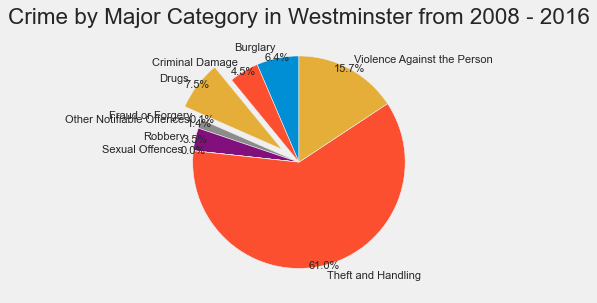

In [205]:
Wsmt_major_0816 = df[(df['borough']=='Westminster')].groupby(['major_category'])['value'].sum()

Wsmt_major_0816.plot(kind='pie',
                     fontsize=10,
                     figsize=(5, 4),
                     autopct='%1.1f%%',
                     startangle=90, 
                     pctdistance=1., 
                     explode=[0, 0, 0.2, 0, 0, 0, 0, 0, 0]
)

plt.title('Crime by Major Category in Westminster from 2008 - 2016')
plt.ylabel('')
plt.show()


#### Answer 4
### The percentage of Drugs major category that happened in Westminster from 2008-2016 is 7.5%

#### Question 5
### What is the number of third quartile of Westminster crime from 2008-2016?

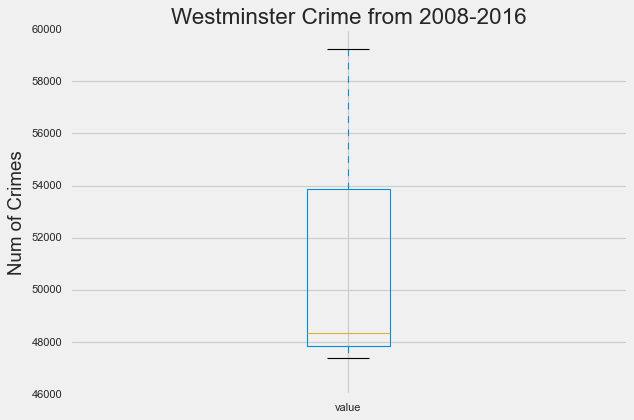

In [202]:
Wsmt_yr_0816 = df[(df['borough']=='Westminster')].groupby(['year'])['value'].sum()


Wsmt_yr_0816.plot(kind='box')
plt.style.use('fivethirtyeight')
plt.title('Westminster Crime from 2008-2016')
plt.ylabel('Num of Crimes')
plt.show()

#### Answer 5
### The number of third quartile of Westminster crime from 2008-2016 is almost 54,000 crimes

In [208]:
Wsmt_yr_0816

year
2008    47846
2009    48456
2010    48116
2011    54243
2012    59226
2013    53852
2014    47564
2015    47395
2016    48330
Name: value, dtype: int64

In [209]:
Wsmt_yr_0816.describe()

count        9.000000
mean     50558.666667
std       4201.683918
min      47395.000000
25%      47846.000000
50%      48330.000000
75%      53852.000000
max      59226.000000
Name: value, dtype: float64

In [200]:
#coba-coba aja
Wsmt_yr_0816xx = df.loc[(df['borough'].isin(['Westminster']))]
                        
Wsmt_yr_0816xx.groupby(['year'])['value'].sum()

year
2008    47846
2009    48456
2010    48116
2011    54243
2012    59226
2013    53852
2014    47564
2015    47395
2016    48330
Name: value, dtype: int64

#### Question 6
### What year has the most number of crimes in Westminster during 2008-2016?

In [227]:
df_wsmt_yr_0816 = pd.DataFrame(df[(df['borough']=='Westminster')].groupby(['year'])['value'].sum())
df_wsmt_yr_0816.index = map(int, df_wsmt_yr_0816.index)
df_wsmt_yr_0816.reset_index(inplace=True)
df_wsmt_yr_0816.columns=['Year', 'Total']

df_wsmt_yr_0816

Year  Total
0  2008  47846
1  2009  48456
2  2010  48116
3  2011  54243
4  2012  59226
5  2013  53852
6  2014  47564
7  2015  47395
8  2016  48330

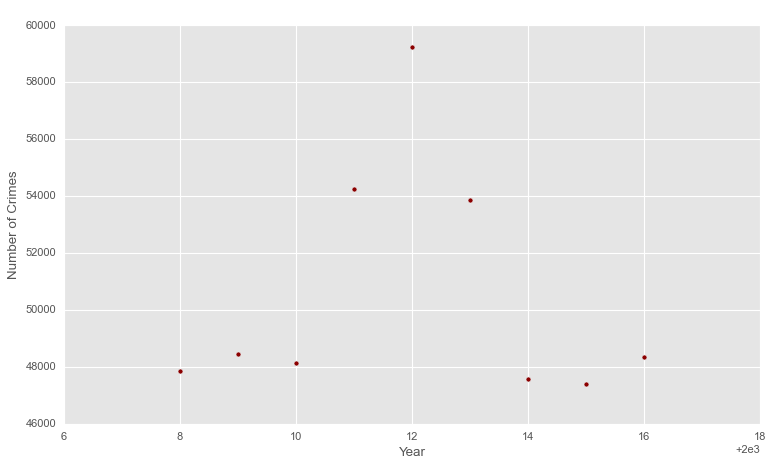

In [233]:
plt.style.use('ggplot')

df_wsmt_yr_0816.plot(kind='scatter',
                 x='Year',
                 y='Total',
                 figsize=(10,6),
                 color='darkred'
)

plt.title('Westminster Crime from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

#### Answer 6
### 2012 has the most number of crimes in Westminster during 2008-2016

## WordCloud from London Crime Borough

In [243]:
df_boro = pd.DataFrame(df.groupby(['borough'])['value'].sum())
#boro.sort_values(ascending=False)
df_boro.head()

value
borough                     
Barking and Dagenham  149447
Barnet                212191
Bexley                114136
Brent                 227551
Bromley               184349

In [250]:
df_boro.sort_values(by=['value'], ascending=False).head(10)

value
borough              
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Croydon        260294
Ealing         251562
Islington      230286
Tower Hamlets  228613
Brent          227551

In [244]:
total_crime = df_boro['value'].sum()
total_crime

6447758

In [245]:
max_words = 100
text =''
for borough in df_boro.index.values:
    if len(borough.split()) ==1:
        repeat_num_times = int(df_boro.loc[borough, 'value'] / float(total_crime) * max_words)
        text = text + ((borough + ' ')* repeat_num_times)
        
text

'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

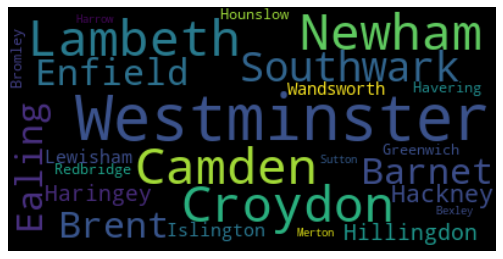

In [251]:
boro_wc = wordcloud.WordCloud(background_color='black').generate(text)
plt.figure(figsize=(7,5))
plt.imshow(boro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [279]:
ld_lat = 51.5074
ld_long = 0.1278

ld_map = folium.Map(location=(ld_lat, ld_long), zoom_start=10)
ld_map

### Choropeth Map of Crime in London from 2008-2016

In [274]:
df_boro2 = pd.DataFrame(df.groupby(['borough'])['value'].sum())
df_boro2.reset_index(inplace=True)
df_boro2.columns=['borough', 'value']
df_boro2.sort_values(by='value', ascending=False).head()

borough   value
32  Westminster  455028
21      Lambeth  292178
27    Southwark  278809
5        Camden  275147
24       Newham  262024

In [275]:
#url ='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'
#urllib.request.urlretrieve(url, 'world_countries.json')
#with urlopen('https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json') as response:
#    world_geo = json.load(response)
print('Crime rate in boroughs of London')
print('Please zoom in to view the map')
      
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[51.5074,0.1278], zoom_start=10, tiles = 'Mapbox Bright')
 
#54.237933,-2.36967

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df_boro2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of crimes in boroughs of London from 2008-2016'
)

#folium.LayerControl().add_to(world_map)
#world_map.save('LondonCrime.html')

display(world_map)

Crime rate in boroughs of London
Please zoom in to view the map


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [255]:
df2=df[['borough','value']]
df2

borough  value
0            Croydon      0
1          Greenwich      0
2            Bromley      0
3          Redbridge      0
4         Wandsworth      0
...              ...    ...
13490599       Brent      0
13490600  Hillingdon      1
13490601      Sutton      0
13490602     Croydon      0
13490603      Merton      0

[13490604 rows x 2 columns]

In [276]:
#url ='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'
#urllib.request.urlretrieve(url, 'world_countries.json')
#with urlopen('https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json') as response:
#    world_geo = json.load(response)
print('Crime rate in boroughs of London')
print('Please zoom in to view the map')
      
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[51.5074,0.1278], zoom_start=10, tiles = 'Mapbox Bright')
 
#54.237933,-2.36967

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of London from 2008-2016'
)

#folium.LayerControl().add_to(world_map)
#world_map.save('LondonCrime.html')

display(world_map)

Crime rate in boroughs of London
Please zoom in to view the map
